# The purpose of this notebook is to explore the combined data shape file in GeoPandas.

### Imports

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [2]:
df = gpd.read_file('../cleaned_datasets/all_plus_facilities/all_plus_facilities.shp')

In [3]:
df.columns

Index(['tract_num', 'company', 'corp', 'num_refine', 'county', 'respir_hi',
       'neurol_hi', 'develop_hi', 'reprodu_hi', 'kidney_hi', 'immuno_hi',
       'tot_bod_hi', 'total_r/m', 'ptstat_r/m', 'benzen_r/m', 'coke_r/m',
       'butadi_r/m', 'benzene_t', 'toluene_t', 'eth_benz_t', 'xylenes_t',
       'diesel_t', 'trimeth_t', 'coke_t', 'butadien_t', 'county_num',
       'cancer_%', 'cancer_%_l', 'cancer_%_h', 'total_pop', 'geo_loc', 'mtfcc',
       'aland', 'awater', 'intptlat', 'intptlon', 'households', 'below_pove',
       'hh_snap', 'hh_nowork', 'tract_name', 'below50pov', 'below125po',
       'below150po', 'below185po', 'below200po', 'below300po', 'below400po',
       'below500po', 'facility_n', 'industry_s', 'number_fac', 'weighted_m',
       'geometry'],
      dtype='object')

In [3]:
df = gpd.read_file('../cleaned_datasets/all_data_txshp/all_data_shape.shp')

## Explore the data

In [4]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5493 entries, 0 to 5492
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tract_num   5493 non-null   int64   
 1   company     5493 non-null   object  
 2   corp        5493 non-null   object  
 3   num_refine  5493 non-null   float64 
 4   county      5493 non-null   object  
 5   respir_hi   5493 non-null   float64 
 6   neurol_hi   5493 non-null   float64 
 7   develop_hi  5493 non-null   float64 
 8   reprodu_hi  5493 non-null   float64 
 9   kidney_hi   5493 non-null   float64 
 10  immuno_hi   5493 non-null   float64 
 11  tot_bod_hi  5493 non-null   float64 
 12  total_r/m   5493 non-null   int64   
 13  ptstat_r/m  5493 non-null   float64 
 14  benzen_r/m  5493 non-null   float64 
 15  coke_r/m    5493 non-null   float64 
 16  butadi_r/m  5493 non-null   float64 
 17  benzene_t   867 non-null    float64 
 18  toluene_t   867 non-null    float64 
 19

In [5]:
df['geometry'].isna().sum()

255

In [6]:
# the rows where missing geometry don't seem to have any important data - they seem to be county summaries

df[df['geometry'].isna()][['tract_num','num_refine','county','total_pop','geo_loc','geometry']].sum()

/var/folders/0z/k5klxhhj5j9g8hc5ygn0nwsr0000gn/T/ipykernel_984/2379347062.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['geometry'].isna()][['tract_num','num_refine','county','total_pop','geo_loc','geometry']].sum()


tract_num                                        12304516000000
num_refine                                                  0.0
county        Entire StateAndersonAndrewsAngelinaAransasArch...
total_pop                                                   0.0
geo_loc                                                       0
dtype: object

In [7]:
len(set(df['county']))

255

### Explore ShapeFile as Geopandas

In [8]:
df.columns

Index(['tract_num', 'company', 'corp', 'num_refine', 'county', 'respir_hi',
       'neurol_hi', 'develop_hi', 'reprodu_hi', 'kidney_hi', 'immuno_hi',
       'tot_bod_hi', 'total_r/m', 'ptstat_r/m', 'benzen_r/m', 'coke_r/m',
       'butadi_r/m', 'benzene_t', 'toluene_t', 'eth_benz_t', 'xylenes_t',
       'diesel_t', 'trimeth_t', 'coke_t', 'butadien_t', 'county_num',
       'cancer_%', 'cancer_%_l', 'cancer_%_h', 'total_pop', 'geo_loc', 'mtfcc',
       'aland', 'awater', 'intptlat', 'intptlon', 'households', 'below_pove',
       'hh_snap', 'hh_nowork', 'tract_name', 'below50pov', 'below125po',
       'below150po', 'below185po', 'below200po', 'below300po', 'below400po',
       'below500po', 'geometry'],
      dtype='object')

In [9]:
df_interest = df.dropna(subset=['geometry']).set_index('tract_num')[['num_refine','company','total_r/m', 'ptstat_r/m',
                                                                    'cancer_%','below_pove','geometry']]

In [10]:
df_interest.head(1)

,num_refine,company,total_r/m,ptstat_r/m,cancer_%,below_pove,geometry
tract_num,,,,,,,
48001950100,0.0,No refineries,30,0.380271,8.5,295.0,"POLYGON ((-95.69702 31.97597, -95.69699 31.976..."


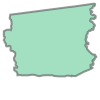

In [11]:
df_interest.loc[48001950100,'geometry']

/var/folders/0z/k5klxhhj5j9g8hc5ygn0nwsr0000gn/T/ipykernel_984/1642486970.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_interest[df_interest['num_refine']>0].centroid.plot()


<AxesSubplot:>

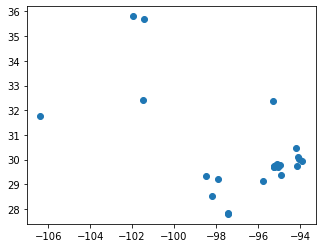

In [12]:
df_interest.explore(column = 'ptstat_r/m',
                   cmap = 'inferno',
                   vmax = df_interest['ptstat_r/m'].quantile(0.99).round()
                   )
df_interest[df_interest['num_refine']>0].centroid.plot()

### Import data from Toxic Release Inventory

In [13]:
# tri = pd.read_csv('../datasets/tri_2017_tx.csv')

# tri.columns[0:50]

# tri_smaller = tri[['4. FACILITY NAME','12. LATITUDE', '13. LONGITUDE','15. PARENT CO NAME','20. INDUSTRY SECTOR']]

# tri_smaller.columns = [x.split('. ')[1].lower().replace(' ','_') for x in tri_smaller.columns]

# tri_smaller = tri_smaller.drop_duplicates(subset=['facility_name']).set_index('facility_name')

# tri_smaller

# def coord_to_tract(lat, long):
#     """ This function identifies the FIPs census tract number for a given latitude and longitude using the 2010 census.
    
#     args:
#         lat (float): Latitude
#         long (float): Longitude
        
#     return:
#         tract (int): census tract number, which is the first 11 digits of the census block FIPs
#     """
#     url = 'https://geo.fcc.gov/api/census/block/find'
    
#     params = {
#         'latitude': lat,
#         'longitude': long,
#         'censusYear': 2010,
#         'format':'json'
#     }
#     res = requests.get(url,params)
#     if res.status_code == 200:
#         fips = res.json()['Block']['FIPS']
#         return fips[0:11]
#     else:
#         print('request_failed')

# tri_smaller.index[519::]

# tri_tract = []
# for facility in tri_smaller.index[519::]:
#     coords = tri_smaller.loc[facility,['latitude','longitude']]
#     tri_tract.append(coord_to_tract(coords[0],coords[1]))
#     if len(tri_tract)%100 == 0:
#         print(len(tri_tract))

# len(tri_tract)

# tri_tract_index = list(zip(tri_smaller.index,tri_tract))

# tracts = [x[1] for x in tri_tract_index]

# tracts.extend(tri_tract)

# tri_smaller['tract'] = tracts

# tri_smaller.to_csv('../cleaned_datasets/tri_2017_tx_cleaned.csv')

In [91]:
# Import already processed data
tri = pd.read_csv('../cleaned_datasets/tri_2017_tx_cleaned.csv')

In [92]:
tri = tri[['facility_name', 'industry_sector', 'tract']]

In [93]:
tri.columns

Index(['facility_name', 'industry_sector', 'tract'], dtype='object')

In [94]:
# Let's combine sites to 1 tract number and add a number of sites to each tract

tri['number_facilities'] = 1

In [95]:
repeats = list(tri['tract'].value_counts().items())

In [96]:
repeat_tracts = [x[0] for x in repeats if x[1] > 1]

In [97]:
# For the repeats, let's combine facility names, company names, and industry

for i in repeat_tracts:
    matches = tri[(tri['tract'] == i)]
    facility_names = matches['facility_name'].str.cat(sep=', ')
    industry_names = ', '.join(x for x in set(matches['industry_sector']))
    tri.loc[matches.index[0],['facility_name','industry_sector','number_facilities']] = [facility_names, industry_names, matches.shape[0]]

In [98]:
tri.drop_duplicates(subset='tract',inplace=True)
tri.reset_index(inplace=True,drop=True)

In [100]:
tri.set_index('tract',inplace=True)

In [101]:
tri

,facility_name,industry_sector,number_facilities
tract,,,
48329010112,"NOVASTAR LP, IMPACT CHEMICAL TECHNOLOGIES INC",Chemicals,2
48161000900,SANDERSON FARMS OAKWOOD FEED MILL,Food,1
48201343600,"LA PORTE METHANOL PLANT, GREIF PACKAGING LLC, ...","Chemicals, Fabricated Metals, Chemical Wholesa...",38
48183010500,"OMNI INDUSTRIAL SOLUTIONS INC, MULTI-CHEM GROU...","Chemical Wholesalers, Machinery, Chemicals",3
48073951000,LEO HICKS CREOSOTING CO INC,Wood Products,1
...,...,...,...
48217960500,WHITNEY READY MIX,Nonmetallic Mineral Product,1
48481740700,BLUE CREEK FOUNDRY,Primary Metals,1
48265960100,JAMES AVERY CRAFTSMAN CENTER,Miscellaneous Manufacturing,1


In [116]:
combined = df.merge(tri, left_on='tract_num', right_on='tract', how='left')

In [117]:
combined = combined[combined['geometry'] != None]

In [118]:
combined['number_facilities'].fillna(0,inplace=True)

In [125]:
combined.to_file('../cleaned_datasets/all_plus_facilities', index=False)

/var/folders/0z/k5klxhhj5j9g8hc5ygn0nwsr0000gn/T/ipykernel_984/883618140.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  combined.to_file('../cleaned_datasets/all_plus_facilities', index=False)
